In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Previsualización de mis datos

In [44]:
df=pd.read_csv('analysis_ML_pandas.csv', encoding='latin1',header=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   # de venta                     1519 non-null   int64  
 1   Fecha de venta                 1519 non-null   object 
 2   Estado                         1510 non-null   object 
 3   Descripción del estado         1510 non-null   object 
 4   Paquete de varios productos    1510 non-null   object 
 5   Unidades                       1510 non-null   float64
 6   Ingresos (MXN)                 1500 non-null   object 
 7   Costos de envío                1500 non-null   object 
 8   Cargo por venta e impuestos    1500 non-null   object 
 9   Anulaciones (MXN)              31 non-null     object 
 10  Total (MXN)                    1500 non-null   object 
 11  Facturación                    1519 non-null   object 
 12  SKU                            0 non-null      f

,# de venta,Fecha de venta,Estado,Descripción del estado,Paquete de varios productos,Unidades,Ingresos (MXN),Costos de envío,Cargo por venta e impuestos,Anulaciones (MXN),...,País,Forma de entrega,Transportista,Número de seguimiento,URL de seguimiento,Fecha en camino,Fecha entregado,Fecha de devolución en camino,Con reclamo,Con mediación
0,2502331936,11 de junio de 2020 14:44 hs.,Entregado,Llegó el 17 de junio,No,5.0,"1,550",0,-475.31,NaN,...,Mexico,Correo y puntos de despacho,Paquetexpress,3971394120959,https://www.paquetexpress.com.mx/rastreo-de-en...,13 de junio | 18:44,17 de junio | 21:21,NaN,No,No
1,2486018504,3 de junio de 2020 14:29 hs.,Entregado,Llegó el 17 de junio,No,1.0,400,-90,-95.06,NaN,...,Mexico,Correo y puntos de despacho,Estafeta,201505906741C600057436,http://www.estafeta.com/Tracking/searchByGet/?...,4 de junio | 15:28,17 de junio | 15:50,NaN,No,No
2,2475666580,29 de mayo de 2020 15:55 hs.,Entregado,Llegó el 30 de mayo,Si,4.0,"1,160",0,-223,NaN,...,Mexico,Mercado Envíos Full,Mercado Envios,28500904946,NaN,29 de mayo | 23:20,30 de mayo | 18:39,NaN,No,No
3,2501104582,10 de junio de 2020 21:00 hs.,Entregado,Llegó el 12 de junio,Si,1.0,344,-54,-89.25,NaN,...,Mexico,Correo y puntos de despacho,DHL,7342808852,http://www.dhl.com.mx/content/mx/es/express/ra...,11 de junio | 17:41,12 de junio | 16:17,NaN,No,No
4,2499205526,10 de junio de 2020 14:33 hs.,Entregado,Llegó el 18 de junio,No,1.0,355,-45,-95.06,NaN,...,Mexico,Correo y puntos de despacho,FedEx,393730862258,http://www.fedex.com/apps/fedextrack/?action=t...,11 de junio | 18:20,18 de junio | 11:53,NaN,No,No


In [45]:
#VIENDO VALORES DE LAS COLUMNAS
print(df.columns)
df['Tipo de publicación'].value_counts()
#CHECANDO EL SIGNIFICADO DE LA COLUMNA DE VARIOS PRODUCTOS
#df[df['Paquete de varios productos']=='Si']['Título de la publicación'].loc[2]
#df[df['# de venta']==2000000581057956]['Título de la publicación'] #ESTA SÍ ES UNA COMPRA DE VARIOS PRODUCTOS, PERO EN EL DF MARCA NaNS

Index(['# de venta', 'Fecha de venta', 'Estado', 'Descripción del estado',
       'Paquete de varios productos', 'Unidades', 'Ingresos (MXN)',
       'Costos de envío', 'Cargo por venta e impuestos', 'Anulaciones (MXN)',
       'Total (MXN)', 'Facturación', 'SKU', '# de publicación',
       'Canal de venta', 'Título de la publicación', 'Variante',
       'Tipo de publicación', 'Nombre del comprador', 'Apellido del comprador',
       'DNI', 'Domicilio', 'Municipio', 'Estado.1', 'Código postal', 'País',
       'Forma de entrega', 'Transportista', 'Número de seguimiento',
       'URL de seguimiento', 'Fecha en camino', 'Fecha entregado',
       'Fecha de devolución en camino', 'Con reclamo', 'Con mediación'],
      dtype='object')


Premium    1189
Clásica     321
Name: Tipo de publicación, dtype: int64

# Cleaning and Wrangling

In [69]:
columns_to_drop=['Estado','Descripción del estado','Paquete de varios productos','Ingresos (MXN)',
       'Costos de envío', 'Cargo por venta e impuestos', 'Anulaciones (MXN)',
       'Total (MXN)', 'Facturación', 'SKU', '# de publicación',
       'Canal de venta','Variante','Nombre del comprador', 'Apellido del comprador',
       'DNI', 'Domicilio', 'Municipio', 'Estado.1', 'Código postal', 'País',
       'Forma de entrega', 'Transportista', 'Número de seguimiento',
       'URL de seguimiento', 'Fecha en camino', 'Fecha entregado',
       'Fecha de devolución en camino', 'Con reclamo', 'Con mediación']
ventas=df.drop(columns_to_drop,axis=1)
ventas.head()

,# de venta,Fecha de venta,Unidades,Título de la publicación,Tipo de publicación
0,2502331936,11 de junio de 2020 14:44 hs.,5.0,Gafas Lentes De Protección Médicos Certificado...,Premium
1,2486018504,3 de junio de 2020 14:29 hs.,1.0,Gafas Lentes De Protección Médicos Certificado...,Premium
2,2475666580,29 de mayo de 2020 15:55 hs.,4.0,Guante Desechable De Látex No Esteril Mediano ...,Premium
3,2501104582,10 de junio de 2020 21:00 hs.,1.0,Guante Desechable De Látex No Esteril Mediano ...,Premium
4,2499205526,10 de junio de 2020 14:33 hs.,1.0,Gafas Lentes De Protección Médicos Certificado...,Premium


In [70]:
print(ventas[ventas.isna().any(axis=1)]) #Me deja TODOS los rows que tengan algún Nan (solo para ver cuáles son)
ventas.dropna(inplace=True)
ventas.index=pd.RangeIndex(0,ventas.shape[0])
ventas.info()

            # de venta                 Fecha de venta  Unidades  \
77    2000000590771166  18 de junio de 2020 20:05 hs.       NaN   
450   2000000538635413    4 de mayo de 2020 19:09 hs.       NaN   
731   2000000566863848    8 de mayo de 2020 03:31 hs.       NaN   
880   2000000575831644   28 de mayo de 2020 17:06 hs.       NaN   
910   2000000613062620  26 de junio de 2020 23:22 hs.       NaN   
1011  2000000581057956  11 de junio de 2020 12:44 hs.       NaN   
1045  2000000569465409   13 de mayo de 2020 09:11 hs.       NaN   
1259  2000000563857748    6 de mayo de 2020 14:07 hs.       NaN   
1420  2000000570583164   14 de mayo de 2020 15:30 hs.       NaN   

     Título de la publicación Tipo de publicación  
77                        NaN                 NaN  
450                       NaN                 NaN  
731                       NaN                 NaN  
880                       NaN                 NaN  
910                       NaN                 NaN  
1011             

In [71]:
months_translation={'enero':'jan','febrero':'feb','marzo':'mar', 'abril':'apr','mayo':'may','junio':'jun','julio':'jul','agosto':'aug','septiembre':'sep','octubre':'oct','noviembre':'nov','diciembre':'dec'}
clean_dates_spanish=ventas[ventas.columns[1]].apply(lambda x: x.replace('de','').split()[:3])
dates_english=[]
for x in clean_dates_spanish:
    dates_english.append(' '.join([x[0],months_translation[x[1]],x[2]]))  
ventas['Fecha de venta']=dates_english

In [52]:
from datetime import datetime
for index, date in enumerate (ventas['Fecha de venta']):
    date = date.lower() #Solo por si hay alguna fecha en mayúsculas
    ventas['Fecha de venta'][index]=datetime.strptime(date, '%d %b %Y')

C:\Users\Dell-G3\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
#APPROACH PONIENDO LAS FECHAS COMO INDEX, PERO COMO TAMBIÉN QUIERO AGRUPAR POR PRODUCTO, CONVIENE UN PIVOT TABLE
#ventas.set_index('Fecha de venta',inplace=True)
#ventas.sort_index(inplace=True)
#ventas.head()

In [54]:
ventas_med=ventas[ventas['Título de la publicación'].isin(['Bata Quirúrgica Desechable No Estéril Impermeable Sms 70g',
       'Bata Desechable Cirujano Estéril Sms 35g Repelente Al Agua',
       'Guante Estéril Desechable De Látex Grande Ambiderm 100 Pzas',
       'Guante Desechable De Látex No Esteril Chico Caja C/100 Pza',
       'Gorro Cofia Desechable Plisado Con Elástico  Paq C/100 Pzas',
       'Gafas Lentes De Protección Médicos Certificados Antiempañado',
       'Bota Desechable Quirúrgica Paq. C/25 Pares (50 Pzas).',
       'Guante Desechable De Látex No Esteril Mediano Caja C/100 Pza',
       'Gorro Desechable Cirujano Paq. C/100 Pzas',
       'Guante De Látex No Esteril Desechable T/grande 100 Pzas'])]
ventas_med.head()

,# de venta,Fecha de venta,Unidades,Título de la publicación,Tipo de publicación
0,2502331936,2020-06-11 00:00:00,5.0,Gafas Lentes De Protección Médicos Certificado...,Premium
1,2486018504,2020-06-03 00:00:00,1.0,Gafas Lentes De Protección Médicos Certificado...,Premium
2,2475666580,2020-05-29 00:00:00,4.0,Guante Desechable De Látex No Esteril Mediano ...,Premium
3,2501104582,2020-06-10 00:00:00,1.0,Guante Desechable De Látex No Esteril Mediano ...,Premium
4,2499205526,2020-06-10 00:00:00,1.0,Gafas Lentes De Protección Médicos Certificado...,Premium


In [55]:
#SLICING DE ventas_med PARA MOSTRAR FECHAS DEL ÚLTIMO MES
ventas_med_recientes=ventas_med[ventas_med['Fecha de venta']>datetime.strptime('2020-06-01',"%Y-%m-%d")]

In [56]:
ventas_med_pivot=ventas_med_recientes.pivot_table(index='Fecha de venta',columns='Título de la publicación',values="Unidades",aggfunc=sum,fill_value=0,margins=False)
ventas_med_pivot.head()

Título de la publicación,Bata Desechable Cirujano Estéril Sms 35g Repelente Al Agua,Bata Quirúrgica Desechable No Estéril Impermeable Sms 70g,Bota Desechable Quirúrgica Paq. C/25 Pares (50 Pzas).,Gafas Lentes De Protección Médicos Certificados Antiempañado,Gorro Cofia Desechable Plisado Con Elástico Paq C/100 Pzas,Gorro Desechable Cirujano Paq. C/100 Pzas,Guante De Látex No Esteril Desechable T/grande 100 Pzas,Guante Desechable De Látex No Esteril Chico Caja C/100 Pza,Guante Desechable De Látex No Esteril Mediano Caja C/100 Pza,Guante Estéril Desechable De Látex Grande Ambiderm 100 Pzas
Fecha de venta,,,,,,,,,,
2020-06-02,0,0,1,11,0,1,0,0,9,1
2020-06-03,0,0,0,5,2,0,0,0,3,2
2020-06-04,0,0,0,11,0,0,0,0,4,1
2020-06-05,0,0,0,6,0,0,0,0,4,4
2020-06-06,0,0,0,4,0,1,0,0,2,0


In [57]:
ventas_med_recientes.groupby('Título de la publicación')['Unidades'].sum() #Solo para comparar con la pivot table con el margins=True

Título de la publicación
Bata Desechable Cirujano Estéril Sms 35g Repelente Al Agua       62.0
Bata Quirúrgica Desechable No Estéril Impermeable Sms 70g        11.0
Bota Desechable Quirúrgica Paq. C/25 Pares (50 Pzas).            71.0
Gafas Lentes De Protección Médicos Certificados Antiempañado    124.0
Gorro Cofia Desechable Plisado Con Elástico  Paq C/100 Pzas      12.0
Gorro Desechable Cirujano Paq. C/100 Pzas                        27.0
Guante De Látex No Esteril Desechable T/grande 100 Pzas          67.0
Guante Desechable De Látex No Esteril Chico Caja C/100 Pza       11.0
Guante Desechable De Látex No Esteril Mediano Caja C/100 Pza    263.0
Guante Estéril Desechable De Látex Grande Ambiderm 100 Pzas      17.0
Name: Unidades, dtype: float64

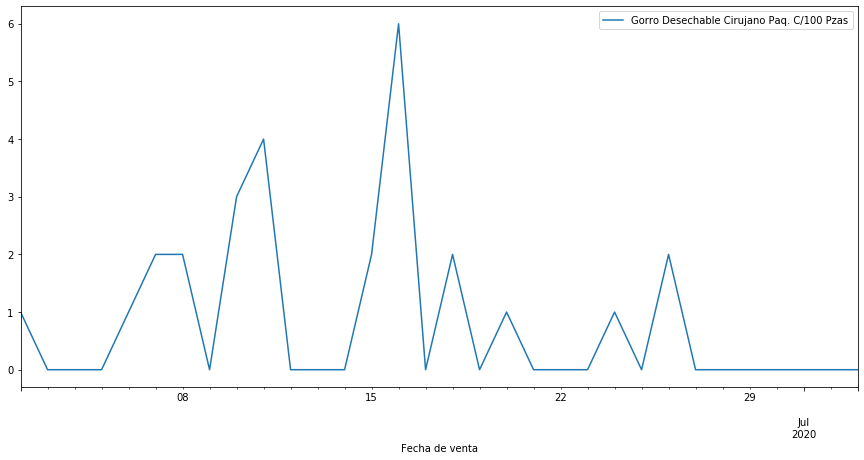

In [77]:
fig_gorro, ax = plt.subplots(figsize=(15,7))
ventas_med_pivot.plot( y='Gorro Desechable Cirujano Paq. C/100 Pzas',use_index=True,ax=ax)
plt.show()

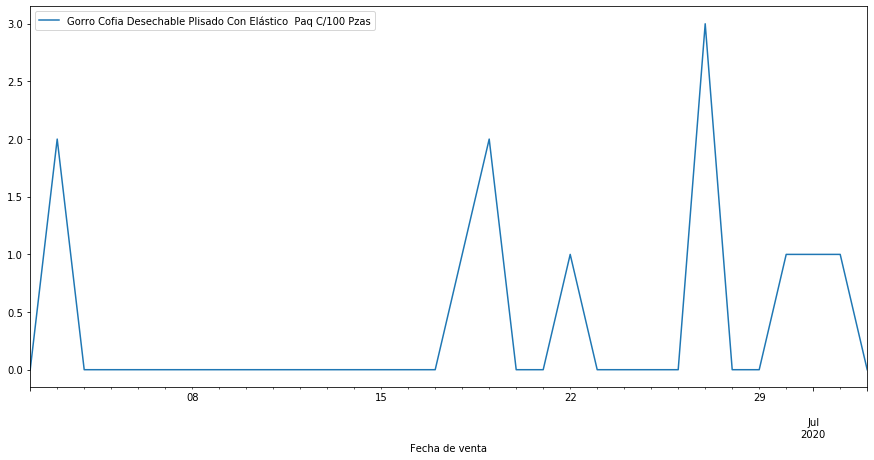

In [78]:
fig_cofia, ax = plt.subplots(figsize=(15,7))
ventas_med_pivot.plot( y='Gorro Cofia Desechable Plisado Con Elástico  Paq C/100 Pzas',use_index=True,ax=ax)
plt.show()

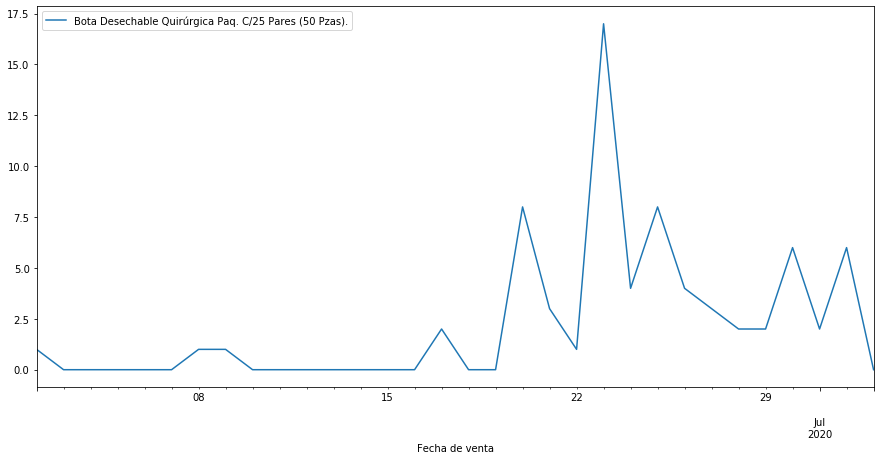

In [60]:
fig_bota, ax = plt.subplots(figsize=(15,7))
ventas_med_pivot.plot( y='Bota Desechable Quirúrgica Paq. C/25 Pares (50 Pzas).',use_index=True,ax=ax)
plt.show()

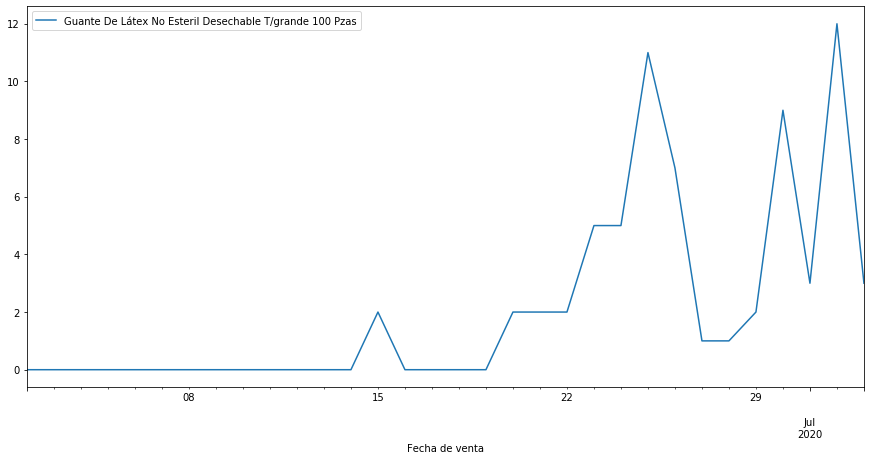

In [61]:
fig_guante_gde, ax = plt.subplots(figsize=(15,7))
ventas_med_pivot.plot( y='Guante De Látex No Esteril Desechable T/grande 100 Pzas',use_index=True,ax=ax)
plt.show()

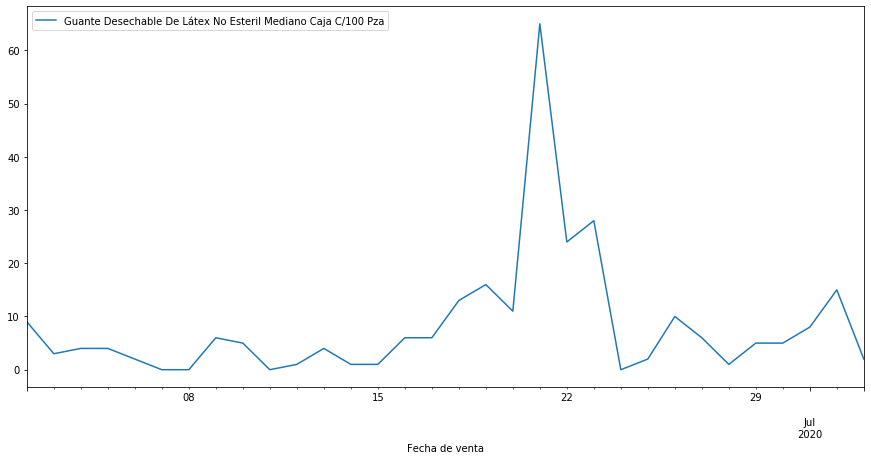

In [62]:
fig_guante_med, ax = plt.subplots(figsize=(15,7))
ventas_med_pivot.plot( y='Guante Desechable De Látex No Esteril Mediano Caja C/100 Pza',use_index=True,ax=ax)
plt.show()

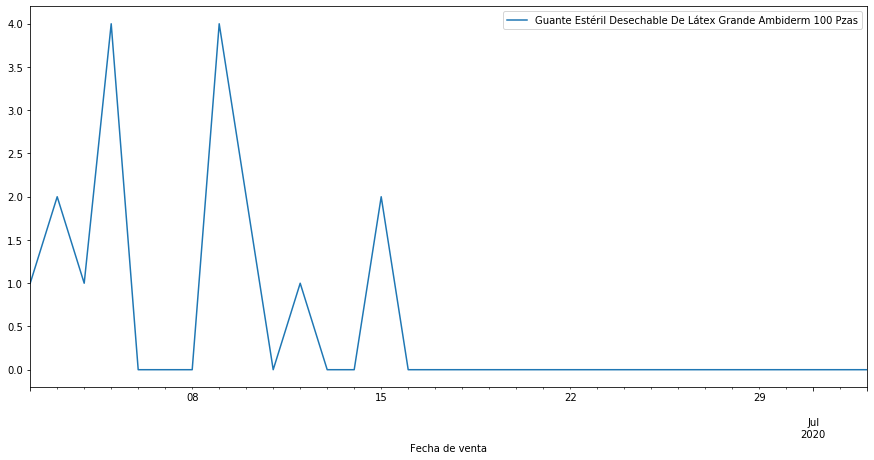

In [63]:
fig_guante_med_esteril, ax = plt.subplots(figsize=(15,7))
ventas_med_pivot.plot( y='Guante Estéril Desechable De Látex Grande Ambiderm 100 Pzas',use_index=True,ax=ax)
plt.show()

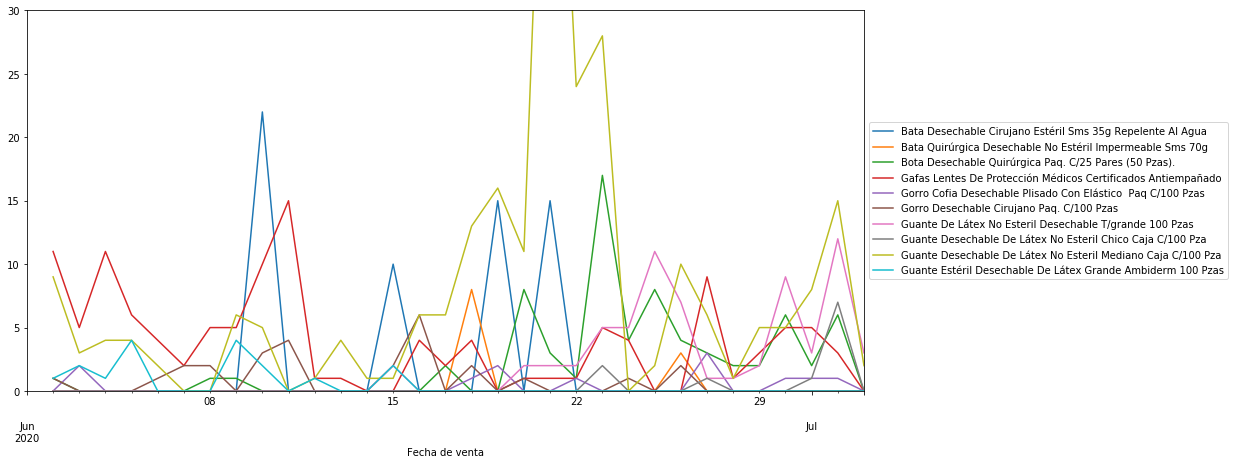

In [64]:
fig_todos, ax = plt.subplots(figsize=(15, 7))
ventas_med_pivot.plot(ax=ax)
# xlim Y ylim SON UNA FORMA DE "HACER ZOOM" EN LA GRÁFICA
plt.ylim(0, 30)
plt.xlim("2020-06-01", "2020-07-03")
# PONE EL RECUADRO FUERA DE LA GRÁFICA
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [65]:
# !jt -l 

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [66]:
# !jt -t chesterish -T 